In [ ]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
sys.path.append('..')
from utils.data_loading import WSL_Dataset

# Load train dataset

In [ ]:
train_set_path = "../data/crops_train_seg_all_64x64_181b_augmented.hdf5"

In [120]:
train_set = WSL_Dataset(train_set_path,
                        bands_idxs=None,
                        transform=None,
                        standardize=False,
                        downsample_classes=[5,10,14,16])


# Inspect shape of crop and label arrays

In [116]:
train_set.size

12732

In [90]:
idx = 0
crop, label = train_set[idx]
print("crop shape: {}".format(crop.shape))
print("label shape: {}".format(label.shape))

crop shape: torch.Size([181, 64, 64])
label shape: torch.Size([64, 64])


# Plot crop and label

Plot crop and label of a given point (idx = 56)

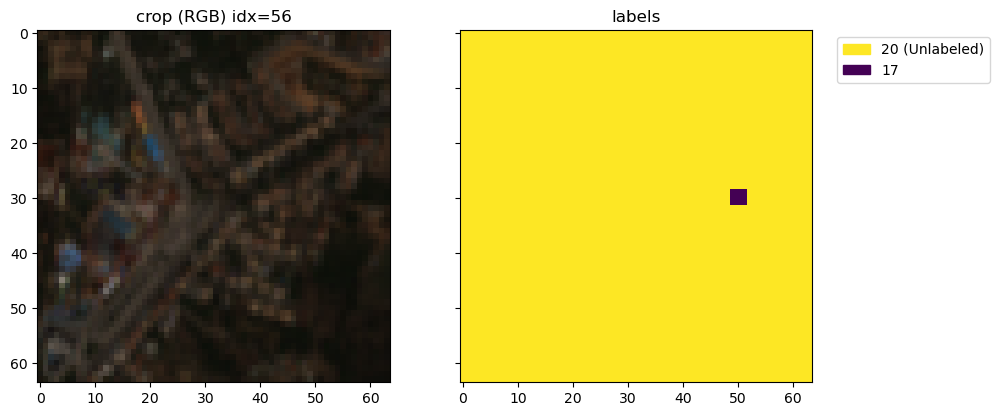

In [ ]:
#inspect crop and label at idx 56
idx = 56
crop, label = train_set[idx]
unique_labels = np.unique(label)

fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(10,10), sharex=True, sharey=True)
axes[0].imshow(crop[:3].permute(1,2,0)[:,:,[2,1,0]]) #gets only the first 3 bands
axes[0].set_title("crop (RGB) idx={}".format(idx))
lbs = axes[1].imshow(label)
axes[1].set_title("labels")


colors = lbs.get_cmap().colors
legend_elements = [
    mpatches.Patch(color=colors[-1], label='20 (Unlabeled)'), 
    mpatches.Patch(color=colors[0], label='{}'.format(unique_labels[0])),  
]
axes[1].legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(1.05, 1))

plt.show()

Plot crop and label of another point (idx = 11).  
This shows an example of downsampling, as the label was among the downsampled_classes

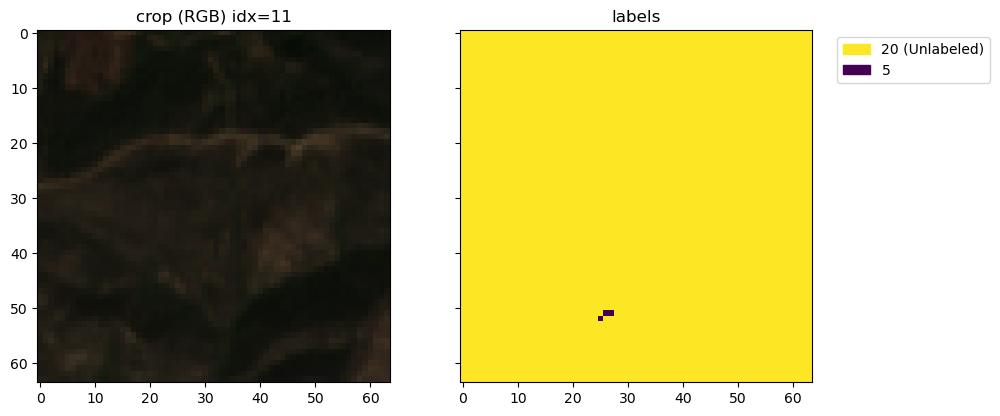

In [115]:
#inspect crop and label at idx 5 (downsampled)
idx = 11
crop, label = train_set[idx]
unique_labels = np.unique(label)

fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(10,10), sharex=True, sharey=True)
axes[0].imshow(crop[:3].permute(1,2,0)[:,:,[2,1,0]]*2) #gets only the first 3 bands. multiply by 2 to improve visualization (brighten)
axes[0].set_title("crop (RGB) idx={}".format(idx))
lbs = axes[1].imshow(label)
axes[1].set_title("labels")


colors = lbs.get_cmap().colors
legend_elements = [
    mpatches.Patch(color=colors[-1], label='20 (Unlabeled)'), 
    mpatches.Patch(color=colors[0], label='{}'.format(unique_labels[0])), 
]
axes[1].legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(1.05, 1))

plt.show()

# Visualize multiple crops at once

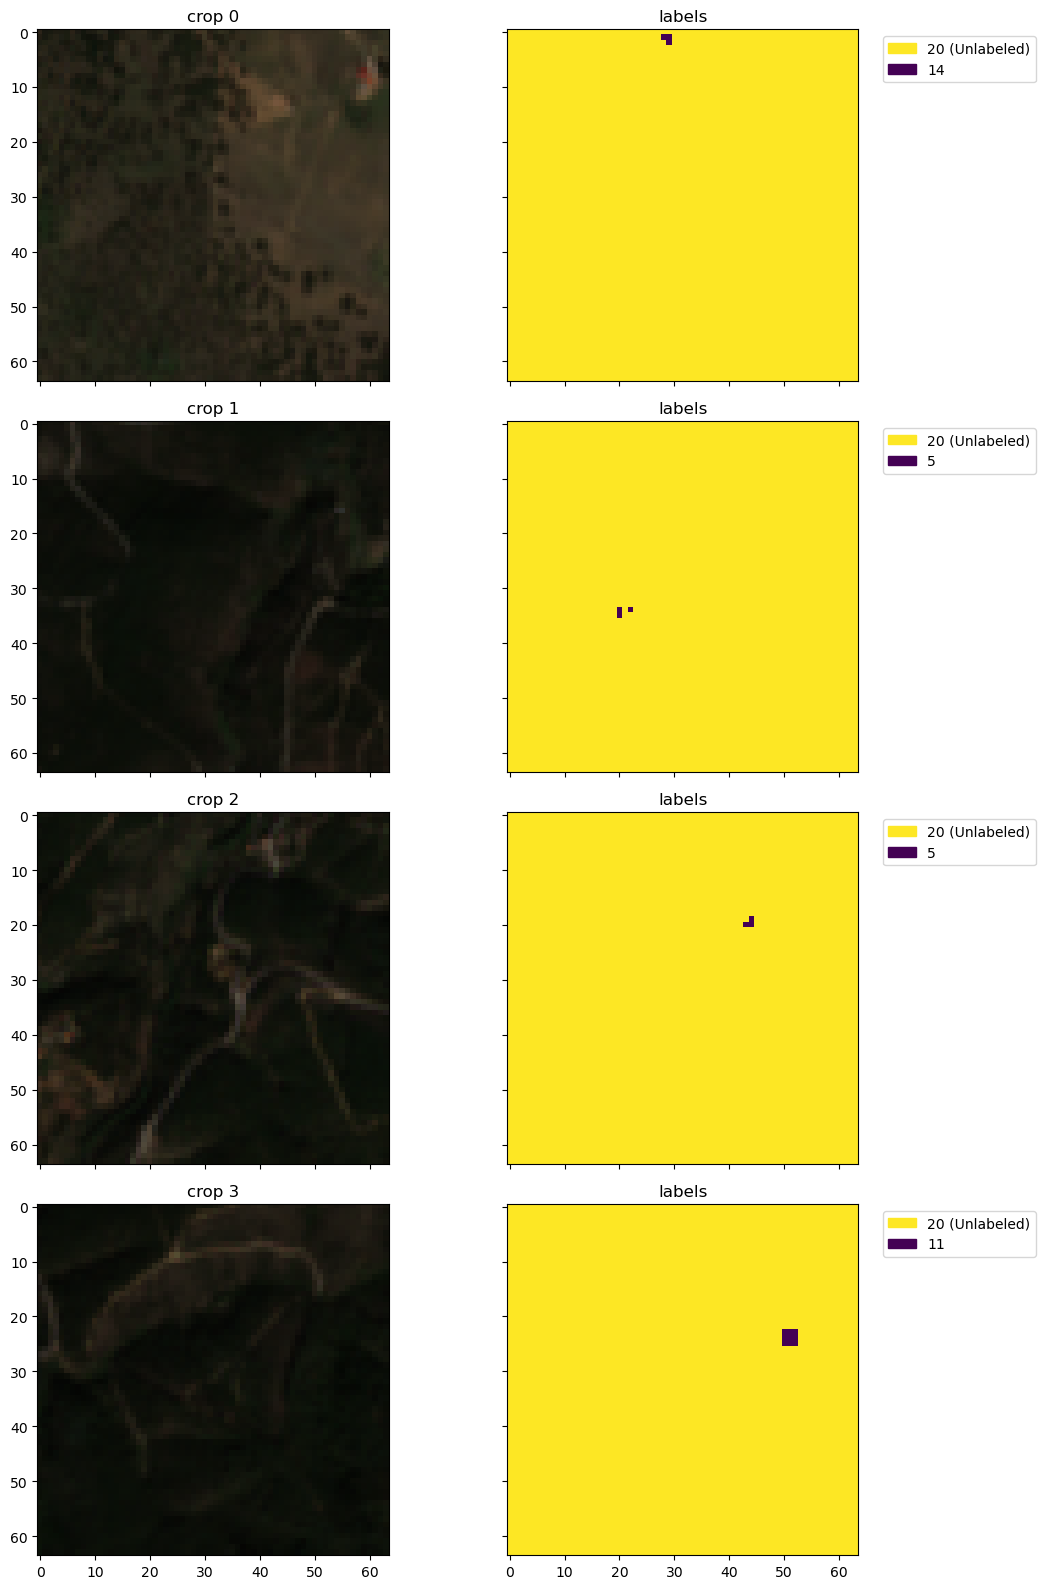

In [ ]:
#visualize 4 random crops at once

fig, axes = plt.subplots(ncols=2, nrows=4, figsize=(12,16), sharex=True, sharey=True)
random_idxs = np.random.choice(np.array([n for n in range(train_set.size)]), size=4, replace=False)
for i in range(len(random_idxs)):
    crop, label = train_set[random_idxs[i]]
    unique_labels = np.unique(label)
    axes[i][0].set_title('crop {}'.format(random_idxs[i]))
    axes[i][0].imshow(crop[:3].permute(1,2,0)[:,:,[2,1,0]]*2) #gets only the first 3 bands. multiply by 2 to improve visualization (brighten)
    axes[i][1].set_title('labels')
    lbs = axes[i][1].imshow(label)

    colors = lbs.get_cmap().colors
    legend_elements = [
        mpatches.Patch(color=colors[-1], label='20 (Unlabeled)'),
        mpatches.Patch(color=colors[0], label='{}'.format(unique_labels[0])), 
    ]
    axes[i][1].legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(1.05, 1))

plt.tight_layout()
